In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

2025-03-29 13:14:30.017961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 13:14:30.028513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743225270.041777  114105 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743225270.045515  114105 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743225270.054356  114105 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10_000)

In [3]:
print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")
print(f"Sample of training data: {x_train[0]}")
print(f"Sample of training label: {y_train[0]}")

Number of training samples: 8982
Number of test samples: 2246
Sample of training data: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Sample of training label: 3


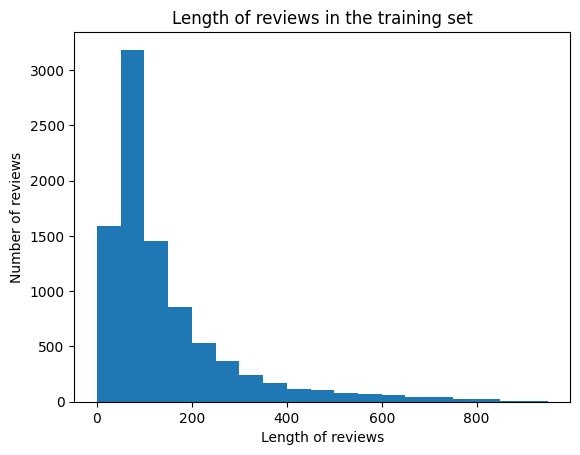

In [4]:
lengths = [len(x) for x in x_train]
plt.hist(lengths, bins=np.arange(0, 1000, 50))
plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.title('Length of reviews in the training set')
plt.show()

In [4]:
max_len = 100
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
num_classes = int(np.max(y_train) + 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
model = keras.Sequential(
    [
        keras.layers.Embedding(10_000, output_dim=128),
        keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        keras.layers.Dense(46, activation="softmax"),
    ]
)

I0000 00:00:1743225284.579292  114105 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2611 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [6]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True,
)

# I don't have the intention of improving this model since training takes a long time

Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.3724 - loss: 2.5456 - val_accuracy: 0.5467 - val_loss: 1.8207
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.5478 - loss: 1.7687 - val_accuracy: 0.5347 - val_loss: 1.8198
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 129ms/step - accuracy: 0.5878 - loss: 1.6109 - val_accuracy: 0.5980 - val_loss: 1.6081
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 130ms/step - accuracy: 0.6327 - loss: 1.4346 - val_accuracy: 0.6318 - val_loss: 1.4663
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 133ms/step - accuracy: 0.6949 - loss: 1.1871 - val_accuracy: 0.6581 - val_loss: 1.3836
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 44s 157ms/step - accuracy: 0.7348 - loss: 1.0234 - val_accuracy: 0.6794 - val_loss: 1.3565
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 129ms/step - accuracy: 0.7855 - loss: 0.8299 - val_accuracy: 0.6839 - val_loss: 1.3108
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 130ms/step - accuracy: 0.8196 - loss: 0